# Arizona Aquifer Recharge Suitability Analysis

Travis Zalesky [](https://orcid.org/0009-0006-0181-3099) (University of Arizona)  
November 7, 2024

Aquifer recharge can be either passive or active, and is implemented in a variety of ways. This analysis seeks to identify regions across AZ which are boadly suitable for aquifer recharge projects as a general template for more focused analysis.

## Introduction

## Data & Methods

**These methods and data layers are preliminary and subject to change**

### Elevation

#### DEM

Elevation and elevation derivatives from 30-m NASA SRTM. USGS 3-DEM (10m) product not suitable for full study area analysis due to (1) the large area of missing data in Mexico, and (2), the excessively high spatial resolution (massively increasing computational requirements).

SRTM elevation sinks filled prior to calculating slope and aspect.

**Should elevation be directly used in the suitability analysis?**

#### Slope

Slope derived from hydrologically conditioned (filled) 30-m SRTM layer using quadratic surface function and a fixed 30-m neighborhood. Slope measured in °.

> Higher slopes are less suitable because thinning is both more expensive and more precipitation will end up as runoff.

Slope classified from 1-10 using a **continuous function** in ArcPro Suitability Mapper.

| Pamameter | Setting |
|:--:|:--:|
| Function | [MSSSmall](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-analyst/the-transformation-functions-available-for-rescale-by-function.htm#ESRI_SECTION1_6C2FDA23D8094B8F99DBF3DF5E176B1D) |
| Mean multiplyer | 1 |
| Sddv multiplier | 2 |
| Lower threshold | 0 |
| Value below threshold | 0 |
| Upper threshold | 90 |
| Value above threshold | 0 |
| Invert function | FALSE |
| Save transformed dataset | TRUE |
| Output | Transformed_SRTM_slope |

<figure>
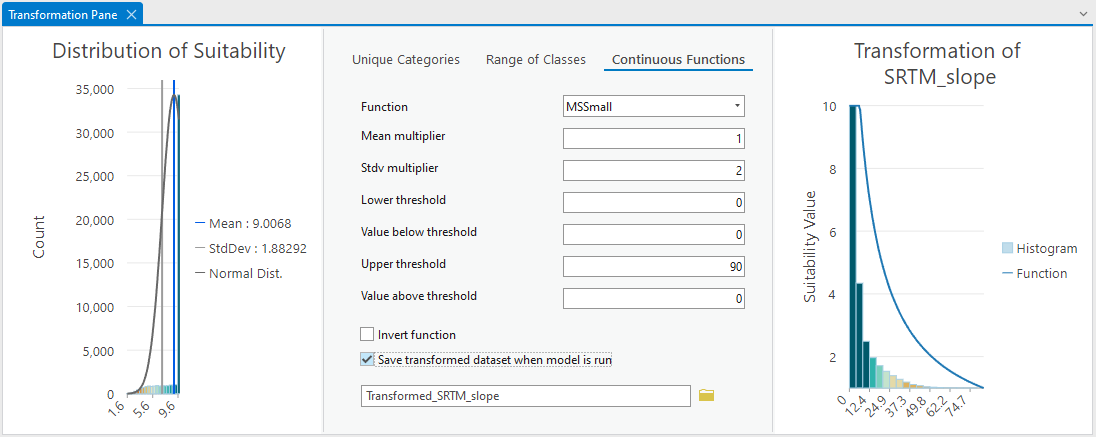
<figcaption aria-hidden="true">Slope suitability mapper rescale transformation setup.</figcaption>
</figure>

#### Aspect

Aspect calculated as with slope. Aspect reference point at N. Pole.

> Aspect has a large impact on solar radiation.

> Closer to 0 or 360 is desired, low suitability scores for closeness.

Aspect classified from 1-10 using a **continuous function** in ArcPro Suitability Mapper.

| Pamameter | Setting |
|:--:|:--:|
| Function | [Near](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-analyst/the-transformation-functions-available-for-rescale-by-function.htm#ESRI_SECTION1_A7FC2FC126CD4A41974C8D3F5E0F8FD6) |
| Mid Point | 180 |
| Point spread | 0.0011049638968393428 (default) |
| Lower threshold | -1 (flat) |
| Value below threshold | 0 |
| Upper threshold | 360 |
| Value above threshold | 0 |
| Invert function | TRUE |
| Save transformed dataset | TRUE |
| Output | Transformed_SRTM_aspect |

<figure>
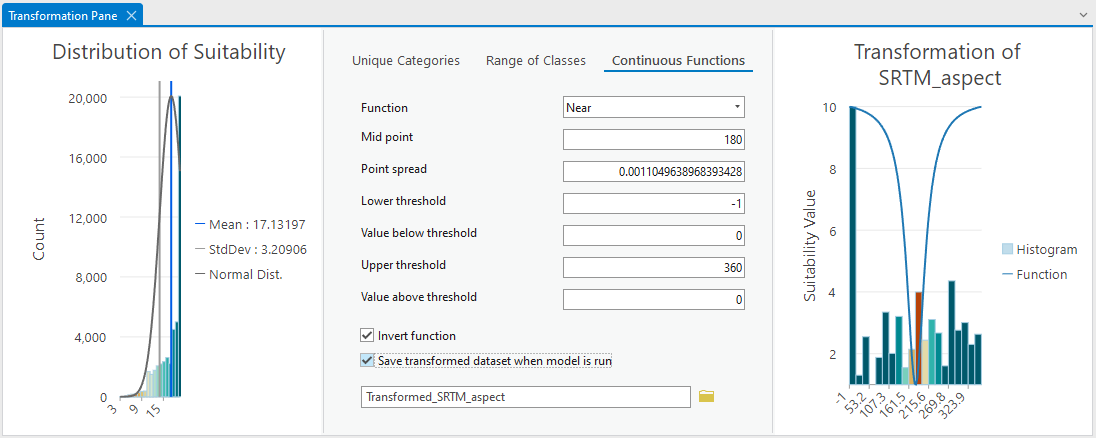
<figcaption aria-hidden="true">Aspect suitability mapper rescale transformation setup.</figcaption>
</figure>

### Precipitation

PRISM normals, 800m resolution. Annual precipitation.

> Mean annual precipitation must be higher than 500mm 1990 - 2020

Precipitation classified from 1-10 using a **continuous function** in ArcPro Suitability Mapper.

NOTE: The logistic growth function may also be a good choice for this dataset. See [Logistic Growth function](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-analyst/the-transformation-functions-available-for-rescale-by-function.htm#ESRI_SECTION1_76ED0A2D02A24C95B98B8A691603F2F4)

| Pamameter | Setting |
|:--:|:--:|
| Function | [MSLarge](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-analyst/the-transformation-functions-available-for-rescale-by-function.htm#ESRI_SECTION1_B83C9047549542DE995823E6030A29F3) |
| Mean multiplyer | 1.68 (aproximates 500mm at x-intercept) |
| Sddv multiplier | 1 |
| Lower threshold | 67.33789825439453 (default, minimum) |
| Value below threshold | 0 |
| Upper threshold | 1214.5689697265625 (default, maximum) |
| Value above threshold | 0 |
| Invert function | FALSE |
| Save transformed dataset | TRUE |
| Output | Transformed_PRISM_ppt_30yrnormal_800m |

<figure>
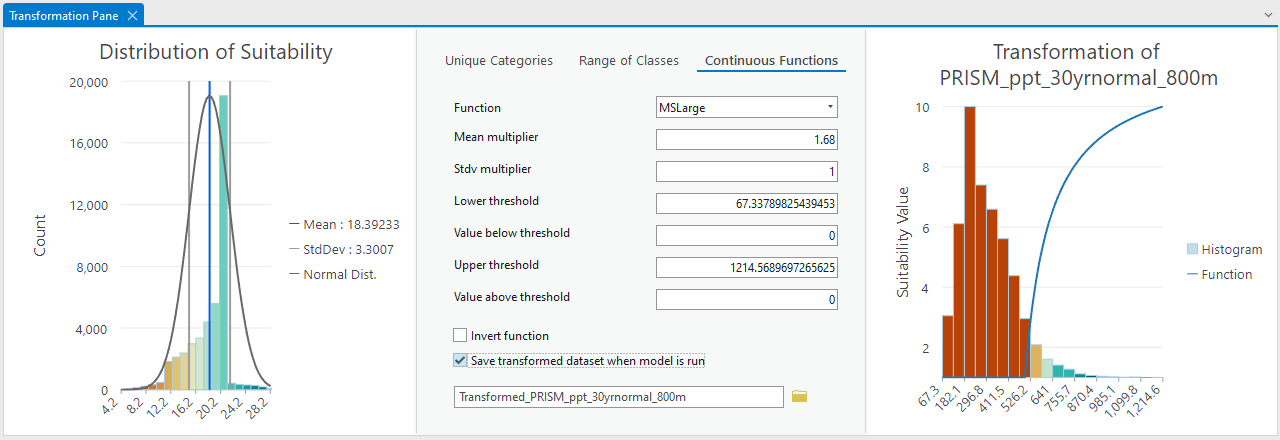
<figcaption aria-hidden="true">Aspect suitability mapper rescale transformation setup.</figcaption>
</figure>

### Vegetation Characteristics

#### NLCD 2021 Total Canopy Cover

#### Landfire

### Soil Hydrology

AZ_Soil_Hydric_Group data layer

**Classification Schema**

| Class | Count (pixels) | Text | Value |
|:----------:|:----------:|:-----------------------------------:|:----------:|
| A | 62559472 | Group A soils consist of deep, well drained sands or gravelly sands with high infiltration and low runoff rates. | 10 |
| B | 76665198 | Group B soils consist of deep well drained soils with a moderately fine to moderately coarse texture and a moderate rate of infiltration and runoff. | 8 |
| C | 88491710 | Group C consists of soils with a layer that impedes the downward movement of water or fine textured soils and a slow rate of infiltration. | 5 |
| D | 155095790 | Group D consists of soils with a very slow infiltration rate and high runoff potential. This group is composed of clays that have a high shrink-swell potential, soils with a high water table, soils that have a clay pan or clay layer at or near the surface, and soils that are shallow over nearly impervious material. | 2 |
| A/D | 43192 | Group A/D soils naturally have a very slow infiltration rate due to a high water table but will have high infiltration and low runoff rates if drained. | 7 |
| B/D | 18456 | Group B/D soils naturally have a very slow infiltration rate due to a high water table but will have a moderate rate of infiltration and runoff if drained. | 6 |
| C/D | 217771 | Group C/D soils naturally have a very slow infiltration rate due to a high water table but will have a slow rate of infiltration if drained. | 3 |

*Transformed dataset* Transformed_AZ_Soil_Hydric_Group

### Depth to Bedrock

**There are 2 data layers which represent depth to bedrock and it is not clear which data layer is prefered!**

-   AZ_BedrockDepth_cm.tif
    -   218 m resolution
    -   UTM 12N, NAVD88 depth (m) possitive down
    -   0 – 108,273 cm

<figure>
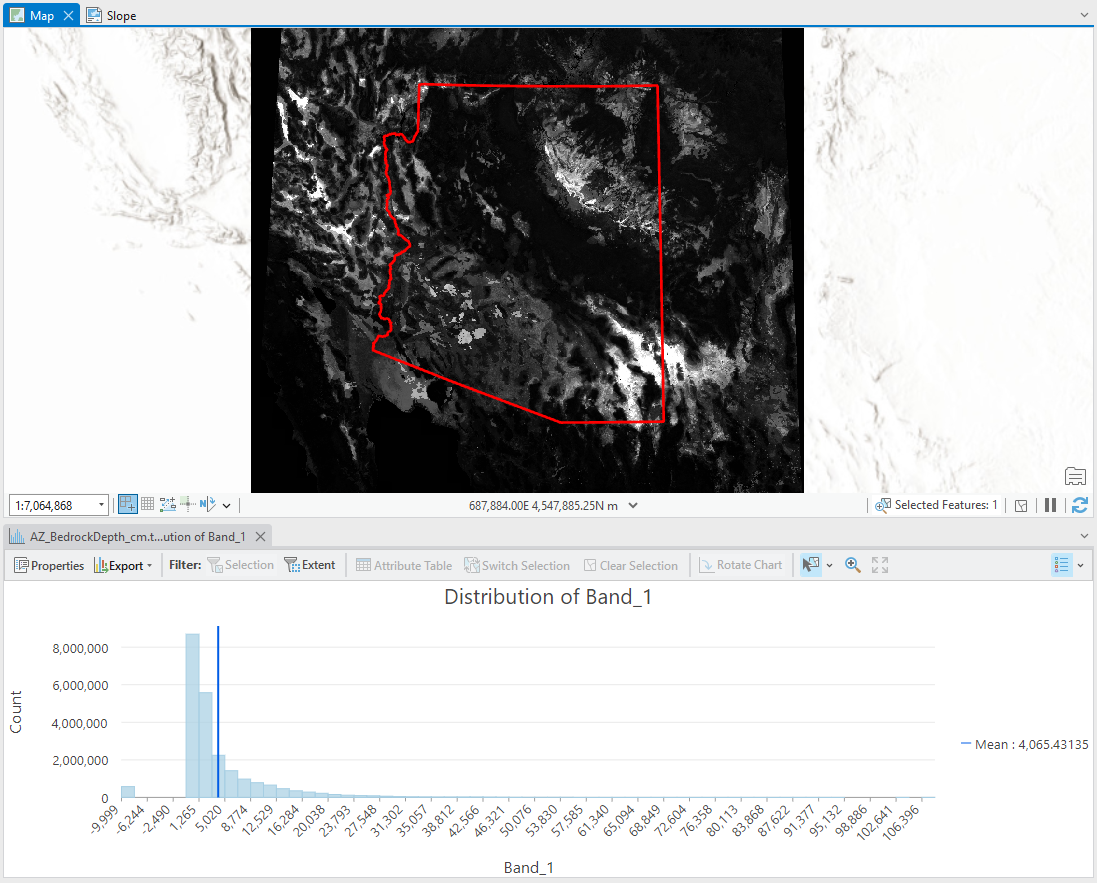
<figcaption aria-hidden="true">AZ_BedrockDepth_cm.tif with histogram.</figcaption>
</figure>

-   Depth to Bedrock WTA
    -   Classified
    -   30 m resolution
    -   UTM 12N, NAVD88 height (m) possitive up
        -   vertical datum is incorrect. Should be depth (m) possitive down
    -   0 – 269 cm
    -   Extremely skewed distribution clustering arround 200 cm

<figure>
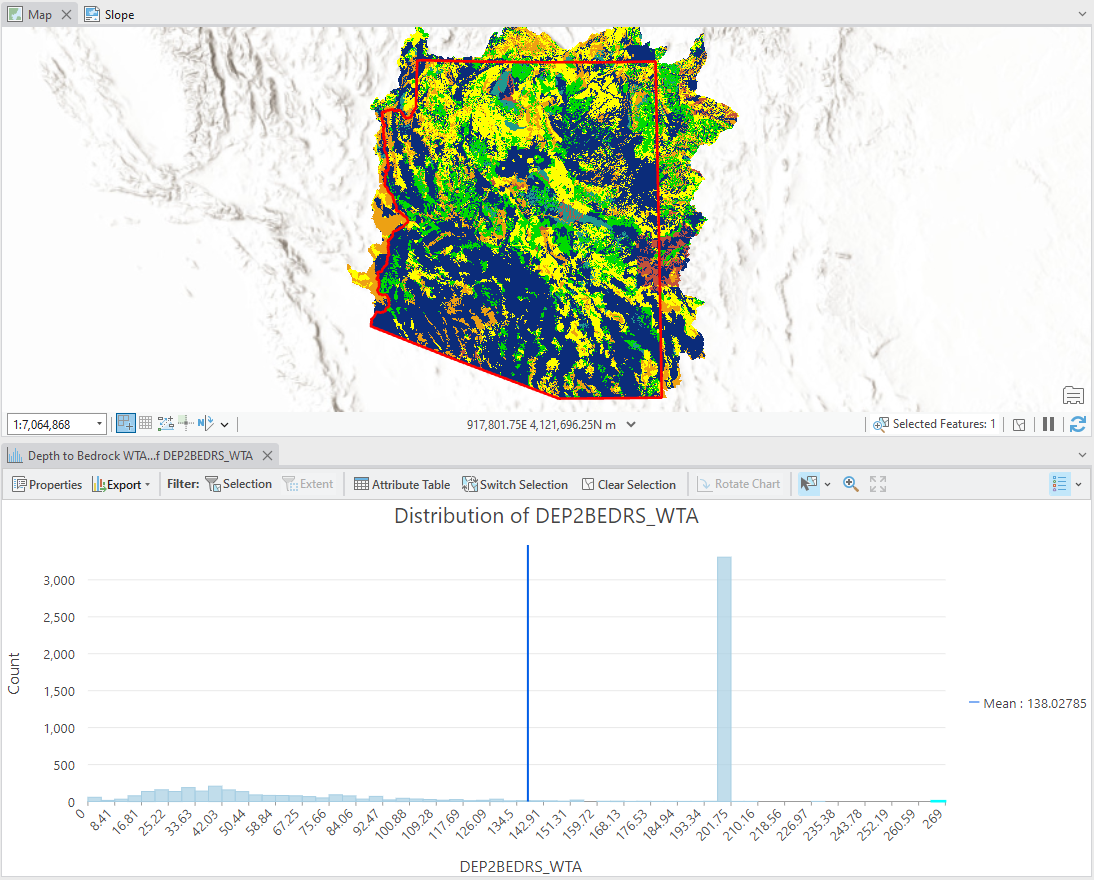
<figcaption aria-hidden="true">Depth to Bedrock WTA, DEP2BEDRS_WTA layer with histogram</figcaption>
</figure>

#### Soil vs. Subsurface Geology Weighting Layers

To quantify the differental importance of soils vs. subsurface geology layers for determining suitability two related data layers had to be calculated.

The logic assumes that there are two uniform subsurface layers, soil, and subsurface geology (i.e. geology). However, the weighted importance of these layers is not uniform across space. Where the bedrock is close to the surface, we assume that the soil is the most important layer for ground water storage. Inversely, when the bedrock is extremely deep, we assume that the geology is the more important layer. Our soil layer is measured at a depth of 200cm (2m), and we assume a uniform soil depth across the state. Therefore, the depth to bedrock was divided by 200 to get a depth to bedrock (dtb) in soil units. The first “soil depth” was ascribed to the soil layer, and varies from 0 to 1, while the remaining “soil depth” were attibuted to the geology layer, with a range from 0 to 541. Ergo, where the bedrock is deepest, the geology layer is 541 time more influential than the soils layer.

<figure>
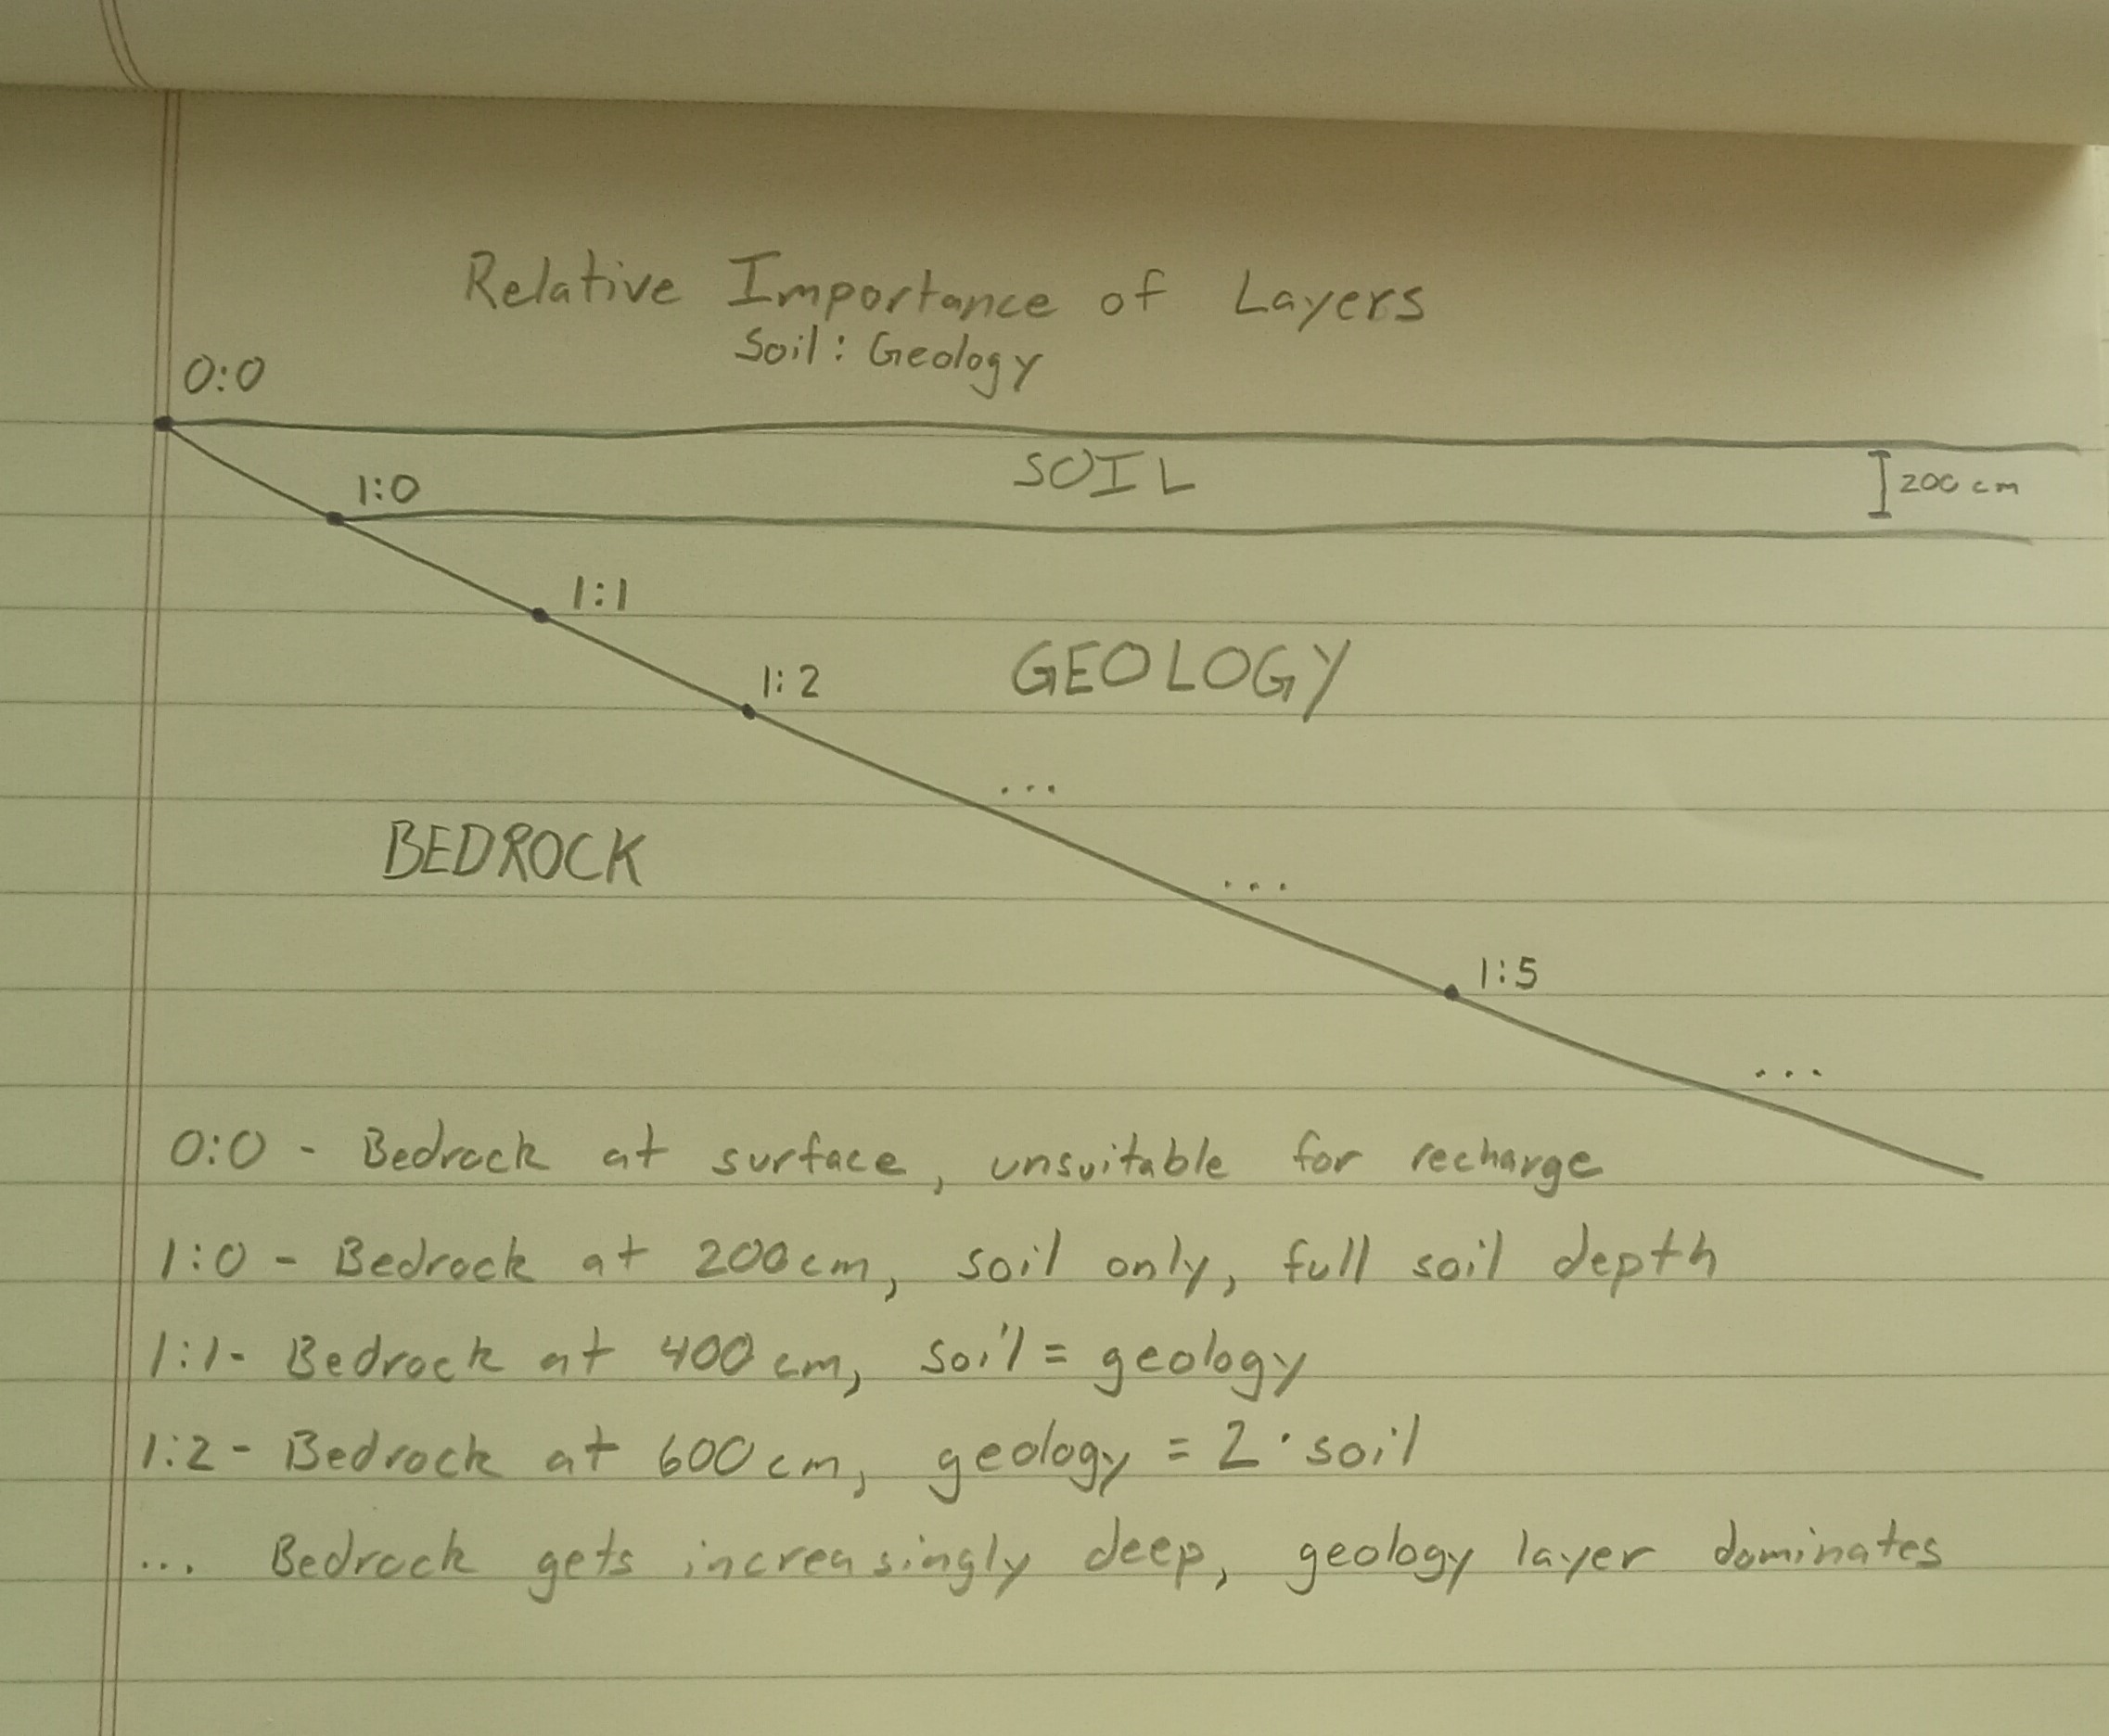
<figcaption aria-hidden="true">Simple diagram of logic underlying the soil vs. subsurface geology weighting layers.</figcaption>
</figure>

These layers were created in a custom R script using the following raster math, with their resulting outputs.

##### Soils

```` markdown
```{r}
# Where depth to bedrock (dtb) = 0cm, soil multiplier = 0 (no soil)
# Where depth to dtb >= 200cm, soil multiplier = 1 (Full depth of soil)
# Intermediate depths = linear
soilMultiplier = masked
soilMultiplier[soilMultiplier > 200] = 200  # Fix upper limit of soil depth = 200 cm
soilMultiplier = soilMultiplier/200
```
````

<figure>
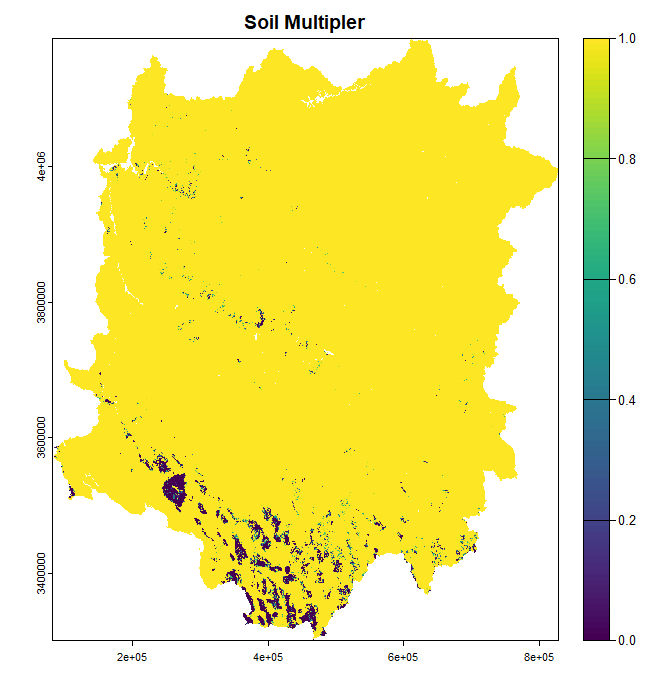
<figcaption aria-hidden="true">Soils multipler layer.</figcaption>
</figure>

##### Geology

```` markdown
```{r}
# Where dtb < 200cm, geology multiplier = 0 (soil only)
# Where dtb >= 200cm, geology multiplier = dtb/200 (in units of relative soil depth)
geologyMultiplier = masked
geologyMultiplier[geologyMultiplier < 200] = 0
geologyMultiplier = geologyMultiplier/200
```
````

<figure>
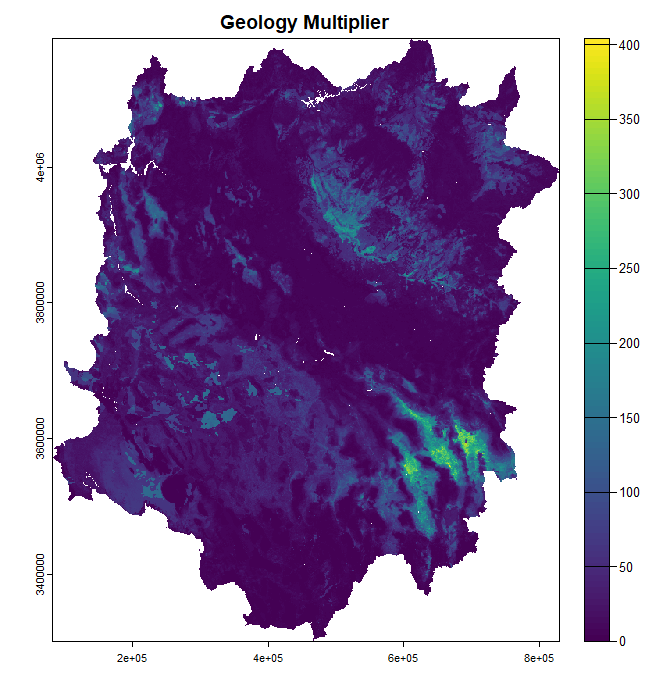
<figcaption aria-hidden="true">Geology multiplier layer.</figcaption>
</figure>

### Other Data Layers for Consideration

#### Global Hydrologic Curve Number(GCN250)

https://gee-community-catalog.org/projects/gcn250/?h=hydrologic

> The GCN250 is a globally consistent, gridded dataset defining CNs at the **250 m spatial resolution** from new global land cover (300 m) and soils data (250 m). GCN250 **represents runoff** for a combination of the European space agency global land cover dataset for 2015 (ESA CCI-LC) resampled to 250 m and geo-registered with the hydrologic soil group global data product (HYSOGs250m) released in 2018. The **potential application** of this data includes **hydrologic design**, land management applications, flood risk assessment, and **groundwater recharge modeling**. The CN values vary depending on antecedent runoff conditions (ARC), which is affected by the rainfall intensity and duration, total rainfall, soil moisture conditions, cover density, stage of growth, and temperature\[.\] *emphasis mine*

#### Soil Properties 800m

https://gee-community-catalog.org/projects/soilprop/?h=

> The data shown here were obtained by aggregating current USDA-NCSS soil survey data (SSURGO back-filled with STATSGO where SSURGO is not available) within **800m² grid cells**. This data aggregation technique results in maps that may not match the original data at any given point, and is **intended to depict regional trends in soil properties at the statewide scale**. *emphasis mine*

-   Pros:
    -   Lots of relevant data layers, such as:
        -   Avail. Water Holding Capacity
        -   Drainage Class
        -   Sat. Hyd. Conductivity
        -   Depth to Restrictive Layer
        -   Hydrologic Group
        -   Soil Depth
        -   etc.
-   Cons:
    -   800m resolution
    -   Large data gaps (layer dependent)

##### Alternative layers

[gNATSGO (gridded National Soil Survey Geographic Database)](https://gee-community-catalog.org/projects/gnatsgo/)

-   Pros:
    -   Authoritative
    -   Source layer for value added products (including Soil Properties 800m)
    -   10m resolution
-   Cons:
    -   Large data gaps across AZ
    -   10m resolution

[Polaris 30m Probabilistic Soil Properties US](https://gee-community-catalog.org/projects/polaris/)

-   Pros:
    -   Continuous data availability (no gaps)
    -   30m resolution
-   Cons:
    -   Fewer data layers
    -   Probabalistic model (increased uncertainty)

## Conclusion

## References